Miriam Marsh - Guided Project - Predicting Cardiovascular Diseases:
A study of heart disease patient information so that a model can be formed based on this information
that can be used to predict the outcome of a patient based on his/her specific characteristics.

In [41]:
import pandas as pd
import numpy as np


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
df = pd.read_csv("heart_disease_prediction.csv")

In [44]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [45]:
df.shape

(918, 12)

In [46]:
for x in df.columns:
    print(x, df[x].isnull().sum())

Age 0
Sex 0
ChestPainType 0
RestingBP 0
Cholesterol 0
FastingBS 0
RestingECG 0
MaxHR 0
ExerciseAngina 0
Oldpeak 0
ST_Slope 0
HeartDisease 0


In [47]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [48]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

This is a dataset of 918 rows and 12 columns. The data contains no null values and the infromation does seem to be a true representative of real-life data. Patients avareage age is 53 years. The median cholesterol level is above the mean, showing that this column may warrant further attention. No bold outliers are noted in the data except for the zero in the 'Cholesterol' column that raises some questions.
The target column for this study is 'HeartDisease' which corresponds to patients who do or do not have heart disease.

Text(0.5, 1.0, 'Correlation of HeartDiseases and Health Factors')

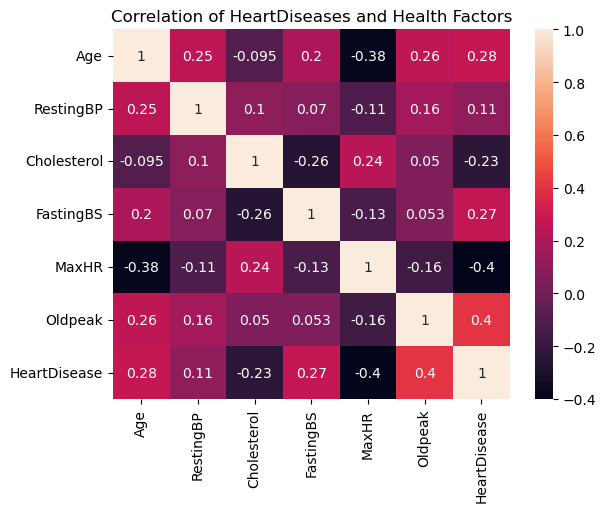

In [49]:
sns.heatmap (df.corr(), annot = True)
plt.title('Correlation of HeartDiseases and Health Factors')

([<matplotlib.axis.XTick at 0x26d734a01f0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

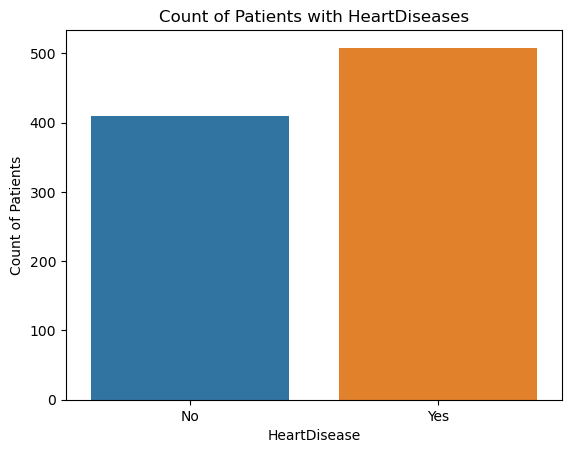

In [50]:
sns.barplot (data=df, x='HeartDisease', y = df['HeartDisease'].value_counts())
plt.title('Count of Patients with HeartDiseases')
plt.ylabel("Count of Patients")
plt.xticks(ticks = [0,1], labels = ['No','Yes'])

It is apparent that this study has 70% males and since the column listing those suffering from heart disease is almost evenly split between male and female, it seems that heart disease affects females more than males. The vast majority of patients have normal resting ECG and most do not have exercise angina. Regarding ST Slope, very few patients have down slopes, much more have 'up' and most have 'Flat'. There are four chest pain types, one of which is very common amongst patients (ASY). NAP and ATA are less common and TA is the most uncommon.

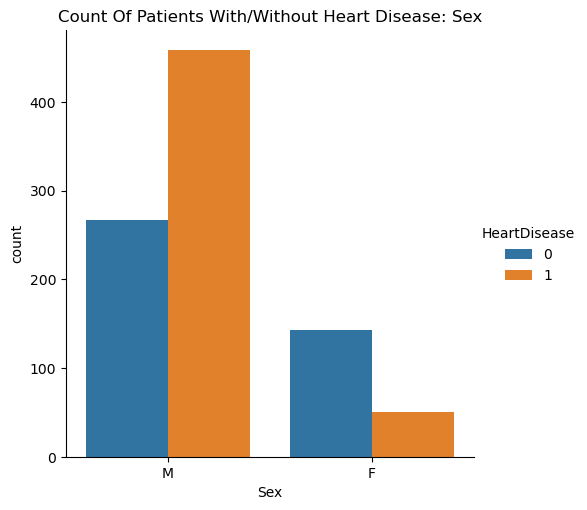

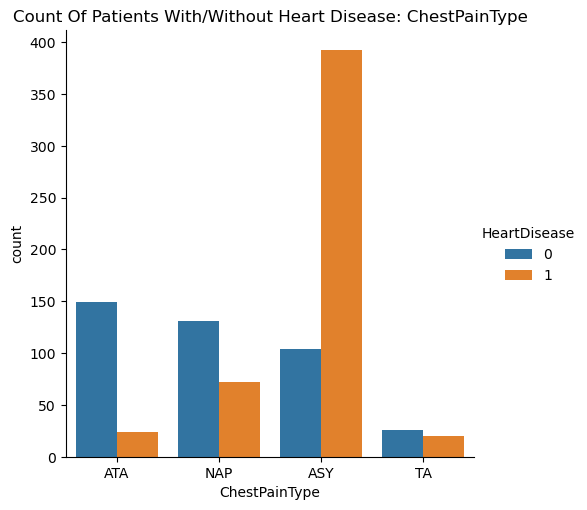

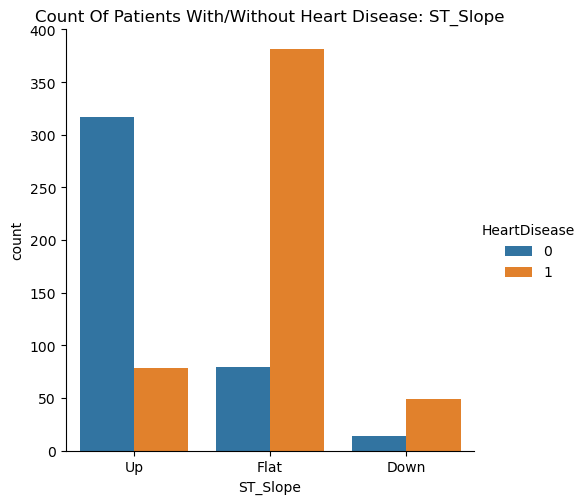

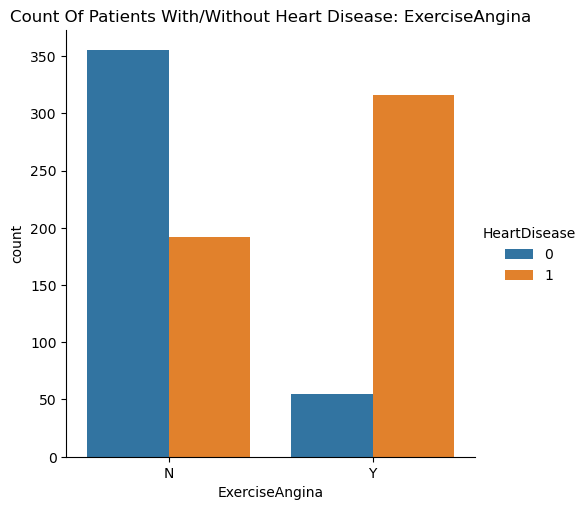

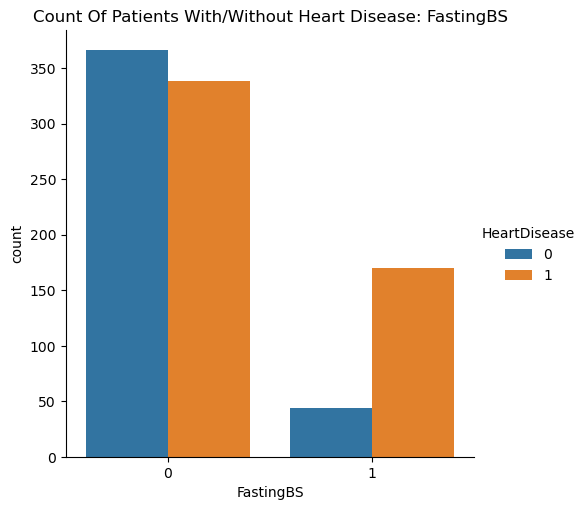

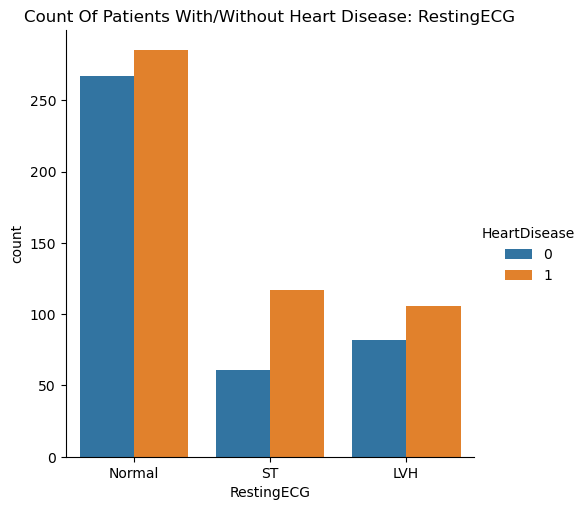

In [51]:
category_columns = ['Sex', 'ChestPainType', 'ST_Slope', 'ExerciseAngina', 'FastingBS', 'RestingECG']
for each in category_columns:
    sns.catplot( kind = 'count', data = df, x = each, hue = 'HeartDisease')
    plt.title(f"Count Of Patients With/Without Heart Disease: {each}")
    plt.show()
    

As noted above, the dataset is highly skewed towards male patients, potentially that could induce bias in our model and impact predictions.
A significant number of patients, diagnosed with heart disease have asymptomatic (ASY) chest pain.
Strikingly, a high number of patients with blood sugar greater than 120 mg/dl were diagnosed with heart disease in relation to those who were not.

Since live patients cannot have resting blood pressure of 0 or 0 cholesterol, we must investigate the variables in the relevant columns

In [52]:
resting_bp_0 = (df['RestingBP'] == 0).sum()
resting_bp_0

1

In [53]:
cholesterol_0 = (df['Cholesterol'] == 0).sum()
cholesterol_0

172

In [54]:
df = df[df.RestingBP != 0]

Since there is only one row with a 0 for Resting Blood Pressure, we can therefor drop the row. 
On the other hand, for the cholesterol there are 172 columns with zero's, if we take out the the zero's the data won't be accurate. We will leave in the zero's for the cholesterol and we will try to get a median. 

In [59]:
cholesterol_median = df[df['Cholesterol'] != 0]
cholesterol_median = cholesterol_median.groupby('HeartDisease')['Cholesterol'].median()
cholesterol_median



HeartDisease
0    231.5
1    246.0
Name: Cholesterol, dtype: float64

There are too many zeros in the Cholesterol column to allow the rows to be dropped. Instead we will use the median Cholesterol level of the specific type of patient to replace the nulls.